In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# preproces

In [2]:
df = pd.read_csv('final_features.csv').drop(['Unnamed: 0'],axis=1)
df

,A,B,C,D,E,F,G,H,I,J,...,990,991,992,993,994,995,996,997,998,999
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,...,1.957430,-1.368883,-0.301499,1.072893,1.546317,1.196306,0.949010,0.566271,2.183582,1.182005
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,...,0.461172,-1.831357,-1.204886,-0.226396,-0.904920,-0.447585,-0.260409,-1.200379,0.226618,0.908569
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,...,0.997498,-1.577309,-2.719056,-0.068784,-2.369685,-1.351754,-0.802335,-1.087701,-0.392465,0.102415
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,...,0.742218,-1.783120,-2.884050,-1.110871,-1.842747,-0.670778,-0.989545,-1.057844,-0.419344,0.556341
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,...,0.643030,-1.598947,-2.405208,-0.836707,-2.280971,-0.830821,-1.082651,-1.184264,0.184482,0.991342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,...,-1.707822,0.964975,-3.341944,-1.109467,-2.197548,0.680147,0.922672,-2.462276,0.274959,2.551766
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,...,-1.693874,2.093219,-3.434451,-0.625785,-1.392595,1.978725,1.931579,-2.735266,1.047569,2.348830
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,...,-1.093918,-0.652697,-3.655031,-1.500917,-1.672543,1.547865,0.351159,-2.692649,0.352426,1.974477
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,...,-0.813006,-1.391962,-2.734077,-0.828948,-2.431532,0.266687,0.771030,-2.098815,0.431145,1.448587


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Columns: 1029 entries, A to 999
dtypes: float64(1026), int64(3)
memory usage: 2.7 MB


In [6]:
cluster = df['A'].value_counts()
for i in range(1 , 37):
    try:
        cluster[i]
    except:
        print(i)

16
17
18
19
20
21


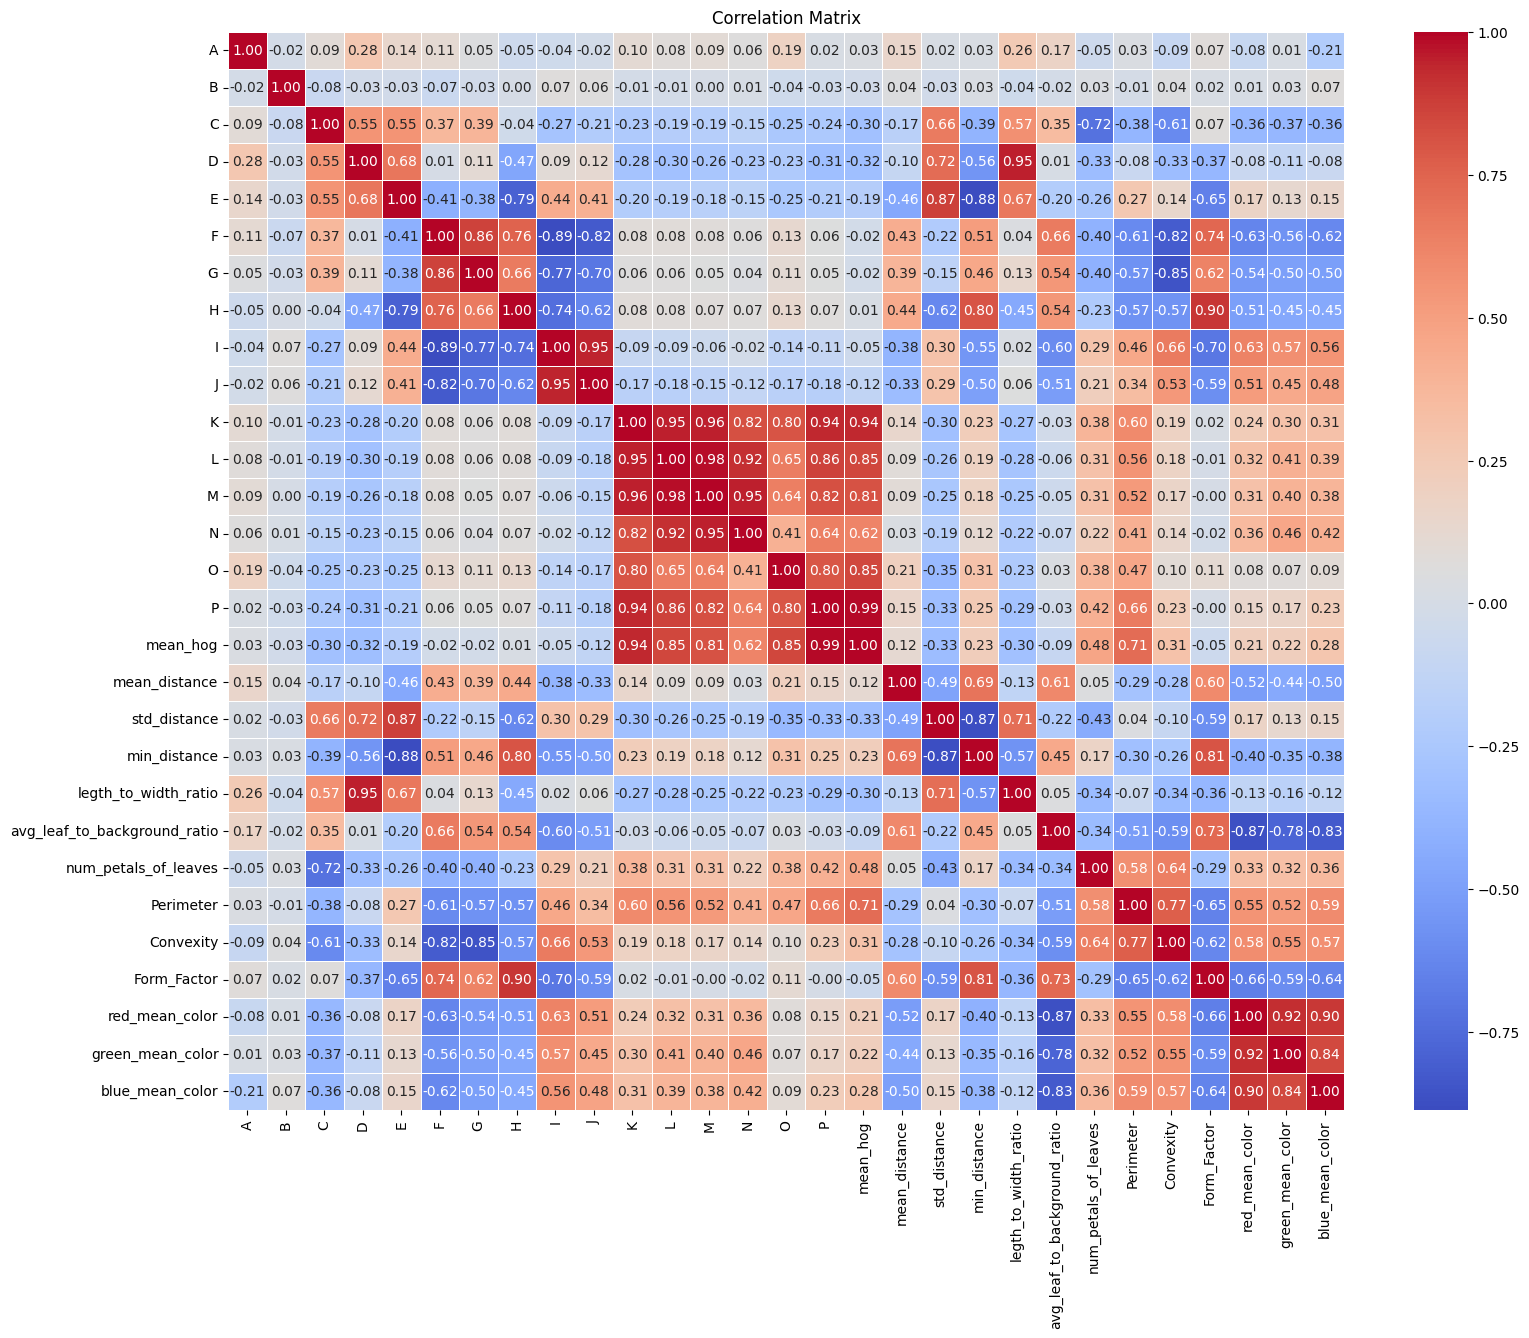

In [12]:
corr_matrix = df.iloc[: , :29].corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# classification

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

categories = df['A']
# gbr = GradientBoostingRegressor(n_estimators=300)
mlp = MLPClassifier( hidden_layer_sizes=(100, 50),max_iter=1000 , random_state=15)#SVC()#LogisticRegression(max_iter=50)
svc = SVC(probability=True)
logistic = LogisticRegression(max_iter=500)
gbr = VotingClassifier(estimators=[
    # ('mlp', mlp), 
    ('logistic', logistic), 
    ('svc', svc),

    ], voting='soft')
mse_per_fold = []
r2_per_fold = []
mse_list = []
r2_list = []
mse_train = []
r2_train = []
scaler = StandardScaler()
# features_scaled = scaler.fit_transform(new_df.iloc[: , 10:]) # new_df.drop(['A','B'] , axis=1)
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[: , 10:], categories, test_size=0.2)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    gbr.fit(X_train, y_train)
    
    # if len(r2_per_fold) == 0:
    #     r2_list , mse_list , r2_train , mse_train= save_r2_and_mse(gbr , X_test , y_test , X_train , y_train)


    y_test_pred = gbr.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    mse_per_fold.append(test_mse)

    r2_fold = r2_score(y_test, y_test_pred)
    r2_per_fold.append(r2_fold)

for i, (mse, r2) in enumerate(zip(mse_per_fold, r2_per_fold), 1):
    print(f"Fold {i} Test MSE: {mse}, R-squared: {r2}")


avg_mse = np.mean(mse_per_fold)
avg_r2 = np.mean(r2_per_fold)
print(f"\nAverage Test MSE: {avg_mse}, Average R-squared: {avg_r2}")


Fold 1 Test MSE: 3.426470588235294, R-squared: 0.9748891773368644
Fold 2 Test MSE: 28.602941176470587, R-squared: 0.7802475330600689
Fold 3 Test MSE: 18.0, R-squared: 0.8364536665880689
Fold 4 Test MSE: 38.63235294117647, R-squared: 0.7319645172132327
Fold 5 Test MSE: 25.91176470588235, R-squared: 0.79411749544215
Fold 6 Test MSE: 25.676470588235293, R-squared: 0.7850543935781361
Fold 7 Test MSE: 16.323529411764707, R-squared: 0.8688417482206405
Fold 8 Test MSE: 1.9264705882352942, R-squared: 0.9843845317813694
Fold 9 Test MSE: 9.161764705882353, R-squared: 0.9046995597607366
Fold 10 Test MSE: 26.36764705882353, R-squared: 0.7897528573497865

Average Test MSE: 19.402941176470588, Average R-squared: 0.8450405480331054


# Clustering

In [83]:
df = pd.read_csv('final_features.csv').drop('Unnamed: 0' , axis=1)
df

,A,B,C,D,E,F,G,H,I,J,...,990,991,992,993,994,995,996,997,998,999
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,...,1.957430,-1.368883,-0.301499,1.072893,1.546317,1.196306,0.949010,0.566271,2.183582,1.182005
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,...,0.461172,-1.831357,-1.204886,-0.226396,-0.904920,-0.447585,-0.260409,-1.200379,0.226618,0.908569
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,...,0.997498,-1.577309,-2.719056,-0.068784,-2.369685,-1.351754,-0.802335,-1.087701,-0.392465,0.102415
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,...,0.742218,-1.783120,-2.884050,-1.110871,-1.842747,-0.670778,-0.989545,-1.057844,-0.419344,0.556341
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,...,0.643030,-1.598947,-2.405208,-0.836707,-2.280971,-0.830821,-1.082651,-1.184264,0.184482,0.991342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,...,-1.707822,0.964975,-3.341944,-1.109467,-2.197548,0.680147,0.922672,-2.462276,0.274959,2.551766
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,...,-1.693874,2.093219,-3.434451,-0.625785,-1.392595,1.978725,1.931579,-2.735266,1.047569,2.348830
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,...,-1.093918,-0.652697,-3.655031,-1.500917,-1.672543,1.547865,0.351159,-2.692649,0.352426,1.974477
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,...,-0.813006,-1.391962,-2.734077,-0.828948,-2.431532,0.266687,0.771030,-2.098815,0.431145,1.448587


In [85]:
from clustering import *
images = Images_class()
images.get_images_inf('leaves_final/')
len(images.binary_images)


340

In [119]:
df.iloc[: , 10:] 

,K,L,M,N,O,P,mean_hog,mean_distance,std_distance,min_distance,...,990,991,992,993,994,995,996,997,998,999
0,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,0.051392,0.703678,0.111736,0.542103,...,1.957430,-1.368883,-0.301499,1.072893,1.546317,1.196306,0.949010,0.566271,2.183582,1.182005
1,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,0.028814,0.704189,0.107399,0.543525,...,0.461172,-1.831357,-1.204886,-0.226396,-0.904920,-0.447585,-0.260409,-1.200379,0.226618,0.908569
2,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,0.019050,0.636708,0.138305,0.465885,...,0.997498,-1.577309,-2.719056,-0.068784,-2.369685,-1.351754,-0.802335,-1.087701,-0.392465,0.102415
3,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,0.024764,0.646394,0.119500,0.469862,...,0.742218,-1.783120,-2.884050,-1.110871,-1.842747,-0.670778,-0.989545,-1.057844,-0.419344,0.556341
4,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214,0.014760,0.627335,0.154731,0.407736,...,0.643030,-1.598947,-2.405208,-0.836707,-2.280971,-0.830821,-1.082651,-1.184264,0.184482,0.991342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810,0.105943,0.666967,0.147156,0.292140,...,-1.707822,0.964975,-3.341944,-1.109467,-2.197548,0.680147,0.922672,-2.462276,0.274959,2.551766
336,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590,0.129710,0.685826,0.135519,0.296964,...,-1.693874,2.093219,-3.434451,-0.625785,-1.392595,1.978725,1.931579,-2.735266,1.047569,2.348830
337,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350,0.088705,0.430635,0.128816,0.190799,...,-1.093918,-0.652697,-3.655031,-1.500917,-1.672543,1.547865,0.351159,-2.692649,0.352426,1.974477
338,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260,0.058292,0.591605,0.204739,0.159810,...,-0.813006,-1.391962,-2.734077,-0.828948,-2.431532,0.266687,0.771030,-2.098815,0.431145,1.448587


In [120]:

categories = df['A']
features = df.iloc[: , 10:] #df.drop(['A' , 'B'] , axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [121]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
kmeans_list = []
silhouette_list = []
for i in range(2 , 50):
    dic = {}
    # kmeans = KMeans(n_clusters=i, random_state=42)
    # clusters = kmeans.fit_predict(features_scaled)

    spectral = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', random_state=42 )
    clusters = spectral.fit_predict(features_scaled)
    

    # model = AgglomerativeClustering(n_clusters=i)
    # model.fit(features_scaled)
    # clusters = model.labels_
    
    silhouette_avg = silhouette_score(features_scaled, clusters)
    print(f'Silhouette Score: {silhouette_avg} with i = {i}')
    dic['k'] = i
    dic['silhouette_avg'] = silhouette_avg
    silhouette_list.append(silhouette_avg)
    kmeans_list.append(dic)


Silhouette Score: 0.11663977728796687 with i = 2
Silhouette Score: 0.10273274900521288 with i = 3
Silhouette Score: 0.09098046906789446 with i = 4
Silhouette Score: 0.07944594896228141 with i = 5
Silhouette Score: 0.10352803718893239 with i = 6
Silhouette Score: 0.10570922582493654 with i = 7
Silhouette Score: 0.10446254424970883 with i = 8
Silhouette Score: 0.12435937138686168 with i = 9
Silhouette Score: 0.13387700377762657 with i = 10
Silhouette Score: 0.13234807862165557 with i = 11
Silhouette Score: 0.13222664381068278 with i = 12
Silhouette Score: 0.13322542607109736 with i = 13
Silhouette Score: 0.12950991243846396 with i = 14
Silhouette Score: 0.13818292725463843 with i = 15
Silhouette Score: 0.14447358174012104 with i = 16
Silhouette Score: 0.15220607053134733 with i = 17
Silhouette Score: 0.15771419368902778 with i = 18
Silhouette Score: 0.16411478916910707 with i = 19
Silhouette Score: 0.1725075243679509 with i = 20
Silhouette Score: 0.1719960025100598 with i = 21
Silhouette

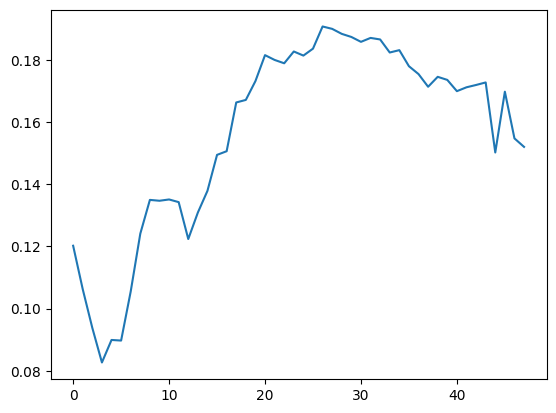

In [106]:
plt.plot(silhouette_list)

In [122]:
sorted_list = sorted(kmeans_list, key=lambda x: x['silhouette_avg'])
sorted_list[-5 : ]

[{'k': 34, 'silhouette_avg': 0.18412741716603437},
 {'k': 27, 'silhouette_avg': 0.18437780370770304},
 {'k': 30, 'silhouette_avg': 0.18719208068802012},
 {'k': 28, 'silhouette_avg': 0.19110526493220373},
 {'k': 29, 'silhouette_avg': 0.19137566852082938}]

In [ ]:
pd.DataFrame(clusters).value_counts()

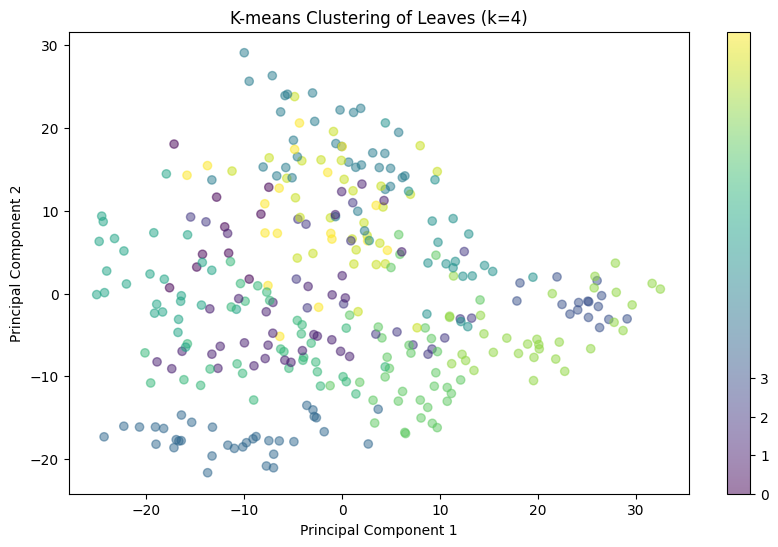

In [211]:
# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=13, random_state=42 , max_iter=1000)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster assignments to the original data
# df['Cluster'] = clusters

# Visualize the clusters using a pair plot (considering the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Leaves (k=4)')
plt.show()


In [212]:
clusters

array([11,  9,  9,  9,  9,  9,  1,  9,  9,  9,  9,  1,  8,  1,  1,  8,  1,
        1,  9,  1,  1,  8,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 11, 11,
       11, 11, 11, 11, 11,  5,  2,  2,  2,  8,  2,  2,  2,  2,  2, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10,  2,  2,  2,  2,  2,  2,  2,  1,
        2,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 11, 11, 11, 11,
       11, 11, 11,  9, 11, 11, 11, 11,  1, 11, 11, 11, 11, 11, 11,  5,  5,
        5, 12,  5,  5,  5,  5,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  0,  7,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  7,  7,  7,  7,
        8,  7,  7,  8,  7,  7,  7,  7,  2,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  4,  8, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10,  1,  9,  5,  1,  1,  5,  9,  9,  5,  1,
        5,  9,  9, 12, 12, 12, 12, 12, 12, 12, 12, 12,  8,  8,  8,  8,  8,
        8, 12,  9,  8,  8

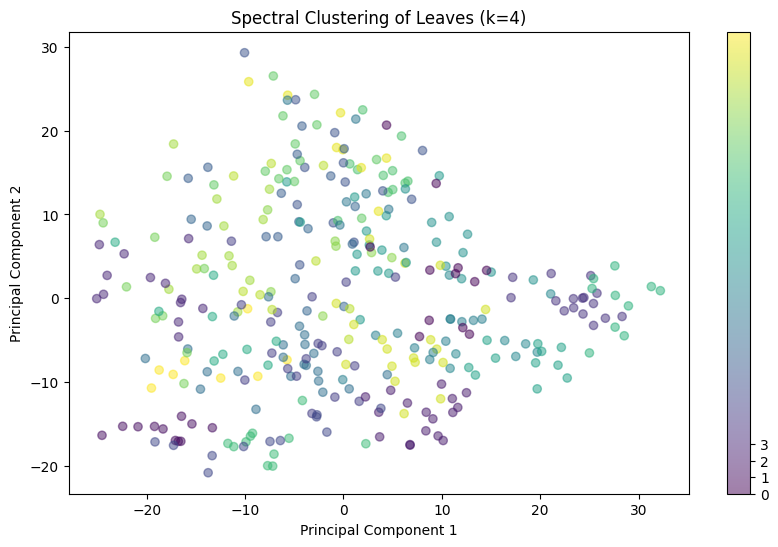

In [234]:
from sklearn.cluster import SpectralClustering
import itertools
# Perform Spectral Clustering with 4 clusters
spectral = SpectralClustering(n_clusters=29, affinity='nearest_neighbors', random_state=42 )
clusters = spectral.fit_predict(features_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spectral Clustering of Leaves (k=4)')
plt.show()

In [235]:
clusters

array([ 7, 26, 26, 26, 26,  2, 26, 26, 26,  2,  2, 26, 28, 28, 28, 28,  5,
       28, 26, 28, 28, 28, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,  7,  7,
        7,  7,  7,  7,  7,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 13, 13, 13, 13, 13, 13, 13, 13,  9,  9,  9,  9,  9,  9,  9,  5,
        9,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 15, 15, 15, 15,
        7, 15,  7, 26, 15,  7, 15, 15, 15,  7, 15, 15, 15, 15, 15, 27, 27,
       27, 27, 27, 27, 27, 27,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       21, 21, 21, 26, 21, 21, 21, 21, 21, 21, 21, 21, 21,  3,  3,  3,  3,
       24,  3,  3, 10,  3,  3,  3,  3, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 10, 10,  5, 10, 10, 10, 10, 10, 10, 10,  5,  5, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 11,  5, 20, 11, 11, 11, 11, 26, 11, 11,
       21, 26, 26,  8,  8,  8,  8,  8,  8,  8,  8,  8, 10, 10, 10, 25, 10,
       10, 23, 26, 10, 10

In [59]:
print(f"with len {len(df[df['Cluster'] == 0])}")
df[df['Cluster'] == 0].describe().T.drop(columns=['75%' , '25%' , "50%" , "std" , 'count']).T

with len 145


,A,B,C,D,E,F,G,H,I,J,...,cluster_on_distances,2_cluster_hog_plot,PC_dectances_from_centroid_1,PC_dectances_from_centroid_2,PC_plot_hog_1,PC_pictures_hog_1,PC_pictures_hog_2,PC_cnn_features_1,PC_cnn_features_2,Cluster
mean,18.02069,6.137931,0.725589,1.780526,0.437938,0.955262,0.993274,0.64554,0.020656,0.119431,...,0.22069,0.255172,2.194681,-1.898755,-0.809661,4.240984,-0.618719,17.798845,-2.592928,0.0
min,1.00000,1.000000,0.117080,1.006600,0.136260,0.858100,0.956140,0.40448,0.003658,0.002436,...,0.00000,0.000000,-7.126612,-5.753886,-4.821616,-7.546606,-9.941613,-5.331740,-28.258076,0.0
max,35.00000,13.000000,0.946000,3.347500,0.708100,0.992560,1.000000,0.84494,0.060707,0.670720,...,1.00000,1.000000,10.452002,4.118272,4.497504,16.981727,11.957644,40.734787,23.004870,0.0


In [60]:
print(f"with len {len(df[df['Cluster'] == 1])}")
df[df['Cluster'] == 1].describe().T.drop(columns=['75%' , '25%' , "50%" , "std" , 'count']).T

with len 141


,A,B,C,D,E,F,G,H,I,J,...,cluster_on_distances,2_cluster_hog_plot,PC_dectances_from_centroid_1,PC_dectances_from_centroid_2,PC_plot_hog_1,PC_pictures_hog_1,PC_pictures_hog_2,PC_cnn_features_1,PC_cnn_features_2,Cluster
mean,18.886525,6.283688,0.697782,3.371735,0.62561,0.825111,0.872987,0.342263,0.063403,1.114971,...,0.503546,0.737589,0.306270,1.146417,1.613003,-1.655872,0.316209,-17.612637,-5.825604,1.0
min,2.000000,1.000000,0.149860,1.011800,0.14538,0.485490,0.396490,0.078376,0.004208,0.003223,...,0.000000,0.000000,-8.144301,-5.308444,-4.582282,-10.646636,-7.766471,-35.963880,-29.395733,1.0
max,36.000000,16.000000,0.998710,19.038000,0.94834,0.987040,1.000000,0.840700,0.198980,7.206200,...,1.000000,1.000000,14.325292,10.458722,6.976740,15.483057,10.755990,4.429129,12.937212,1.0


In [ ]:
plot_five_ex_clusters(clusters , images.rgb_images)

In [17]:
from sklearn.cluster import AgglomerativeClustering

# Choose the number of clusters (this can be determined by various methods)
n_clusters = 9

# Create the agglomerative clustering model
model = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to the data
model.fit(features)
labels = model.labels_
labels

array([2, 7, 7, 7, 0, 7, 7, 7, 0, 0, 0, 7, 2, 3, 3, 7, 7, 3, 7, 7, 7, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 5, 5, 2, 2, 3, 3, 5, 5, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 4, 4, 2, 2, 2,
       2, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 3, 3, 8, 4, 4, 4,
       7, 8, 2, 4, 3, 3, 4, 2, 2, 2, 2, 8, 2, 5, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 7, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 3,
       5, 2, 4, 2, 5, 5, 5, 4, 8, 8, 8, 4, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 3, 7, 3, 3,
       3, 5, 7, 7, 3, 3, 3, 7, 7, 5, 5, 5, 2, 5, 2, 2, 5, 2, 4, 4, 4, 7,
       4, 4, 3, 0, 4, 4, 4, 4, 7, 7, 7, 7, 7, 3, 5, 3, 3, 5, 0, 2, 5, 2,
       5, 5, 2, 5, 2, 5, 2, 5, 5, 0, 0, 0, 7, 0, 0, 0, 0, 7, 0, 0, 0, 2,
       2, 8, 1, 2, 1, 1, 1, 2, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6,
       5, 7, 3, 7, 3, 7, 3, 7, 3, 7, 7, 3, 5, 3, 7,